In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from joblib import dump, load
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

#Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


In [ ]:
import pandas as pd
import numpy as np
import sys
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization,Convolution1D,MaxPooling1D, Reshape, GlobalAveragePooling1D, Flatten
from keras.utils.np_utils import to_categorical
import sklearn.preprocessing
from sklearn import metrics
from scipy.stats import zscore
#from keras.utils import get_file, plot_model
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading training set into dataframe
data = pd.read_csv('/content/drive/MyDrive/Dataset/NF-UNSW-NB15.csv')

In [ ]:
data

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623113,59.166.0.2,1640,149.171.126.8,53,17,0.0,130,162,2,2,0,0,0,Benign
1623114,59.166.0.2,3610,149.171.126.6,21,6,1.0,2044,2404,36,34,26,0,0,Benign
1623115,59.166.0.2,4667,149.171.126.6,40725,6,0.0,320,1918,6,8,27,0,0,Benign
1623116,59.166.0.2,5641,149.171.126.6,56243,6,0.0,528,8824,10,12,27,0,0,Benign


In [ ]:
data.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack'],
      dtype='object')

In [ ]:
data.Attack.value_counts()

Benign            1550712
Exploits            24736
Fuzzers             19463
Reconnaissance      12291
Generic              5570
DoS                  5051
Analysis             1995
Backdoor             1782
Shellcode            1365
Worms                 153
Name: Attack, dtype: int64

In [ ]:
def change_label(data):
  data.Attack.replace(['DoS'],'Dos',inplace=True)
  data.Attack.replace(['Reconnaissance'],'Probe',inplace=True)
  data.Attack.replace(['Generic','Analysis','Exploits','Shellcode','Fuzzers'],'U2R',inplace=True)
  data.Attack.replace(['Benign'],'Normal',inplace=True)
  data.Attack.replace(['Backdoor','Worms'],'R2L',inplace=True)
change_label(data)
data.Attack.value_counts()

Normal    1550712
U2R         53129
Probe       12291
Dos          5051
R2L          1935
Name: Attack, dtype: int64

In [ ]:
data.drop(data.loc[data['Attack']=='Normal'].index[:1000000], axis=0, inplace=True)

In [ ]:
data.Attack.value_counts()

Normal    550712
U2R        53129
Probe      12291
Dos         5051
R2L         1935
Name: Attack, dtype: int64

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(", ".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,\
                int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])
analyze(data)


623118 rows
** IPV4_SRC_ADDR:[59.166.0.2:8.94%, 59.166.0.0:8.93%, 59.166.0.4:8.93%, 59.166.0.1:8.91%, 59.166.0.5:8.89%, 59.166.0.3:8.83%, 59.166.0.6:8.64%, 59.166.0.8:8.63%, 59.166.0.9:8.55%, 59.166.0.7:8.43%, 175.45.176.1:3.26%, 175.45.176.0:3.14%, 175.45.176.3:2.81%, 175.45.176.2:2.71%, 149.171.126.5:0.04%, 149.171.126.1:0.04%, 149.171.126.2:0.04%, 149.171.126.6:0.04%, 149.171.126.8:0.04%, 149.171.126.3:0.04%, 149.171.126.4:0.04%, 149.171.126.7:0.03%, 149.171.126.9:0.03%, 149.171.126.0:0.03%, 10.40.182.1:0.01%, 10.40.85.1:0.01%, 192.168.241.243:0.0%, 149.171.126.16:0.0%, 149.171.126.13:0.0%, 149.171.126.17:0.0%, 149.171.126.11:0.0%, 149.171.126.14:0.0%, 149.171.126.19:0.0%, 149.171.126.15:0.0%, 149.171.126.12:0.0%, 127.0.0.1:0.0%]
** L4_SRC_PORT:64525 (10%)
** IPV4_DST_ADDR:[149.171.126.4:8.97%, 149.171.126.1:8.93%, 149.171.126.3:8.89%, 149.171.126.2:8.88%, 149.171.126.5:8.87%, 149.171.126.0:8.87%, 149.171.126.9:8.65%, 149.171.126.6:8.59%, 149.171.126.7:8.56%, 149.171.126.8:8.47%, 1

In [ ]:
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
29,175.45.176.1,43025,149.171.126.16,25,6,3.0,41290,2080,48,24,27,803,1,U2R
40,175.45.176.3,64923,149.171.126.17,80,6,7.0,994,256,10,6,19,189,1,U2R
67,175.45.176.3,9022,149.171.126.13,111,6,11.0,552,336,10,8,19,678,1,Probe
93,175.45.176.3,1752,149.171.126.10,25,6,3.0,3022,1636,20,20,19,789,1,Dos
115,175.45.176.3,53967,149.171.126.14,111,17,11.0,168,0,2,0,0,0,1,Probe


In [ ]:
data.drop(columns=['Label'],inplace = True)

In [ ]:
data.rename(columns={"Attack": "label"},inplace = True)

In [ ]:
import ipaddress
from ipaddress import IPv4Address

In [ ]:
def IP_deal(df, len):
    arr1 = df.IPV4_SRC_ADDR; arr2 = df.IPV4_DST_ADDR
    arr1 = np.array(arr1)
    arr2 = np.array(arr2)
    for i in range(len):
      try:
        arr1[i] = int(ipaddress.IPv4Address(arr1[i]))
        arr2[i] = int(ipaddress.IPv4Address(arr2[i]))
      except:
        print(arr1[i], i)
        print(arr2[i], i)
    df.IPV4_SRC_ADDR = arr1.reshape(len,1)
    df.IPV4_DST_ADDR = arr2.reshape(len,1)
    return df

data = IP_deal(data, data.shape[0])
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,label
29,2939006977,43025,2511044112,25,6,3.0,41290,2080,48,24,27,803,U2R
40,2939006979,64923,2511044113,80,6,7.0,994,256,10,6,19,189,U2R
67,2939006979,9022,2511044109,111,6,11.0,552,336,10,8,19,678,Probe
93,2939006979,1752,2511044106,25,6,3.0,3022,1636,20,20,19,789,Dos
115,2939006979,53967,2511044110,111,17,11.0,168,0,2,0,0,0,Probe


In [ ]:
# #Reset column names for training set
# train_df.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
# 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
# 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
# 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
# 'num_access_files', 'num_outbound_cmds', 'is_host_login',
# 'is_guest_login', 'count', 'srv_count', 'serror_rate',
# 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
# 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
# 'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
# 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
# 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
# 'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
# train_df.head()

In [ ]:
# #Reset column names for testing set
# test_df.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
# 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
# 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
# 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
# 'num_access_files', 'num_outbound_cmds', 'is_host_login',
# 'is_guest_login', 'count', 'srv_count', 'serror_rate',
# 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
# 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
# 'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
# 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
# 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
# 'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
# test_df.head()

In [ ]:
# #Dropping the last columns of training set
# train_df = train_df.drop('difficulty_level', 1) # we don't need it in this project
# train_df.shape
# #Dropping the last columns of testing set
# test_df = test_df.drop('difficulty_level', 1)
# test_df.shape

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_col = data.select_dtypes(include='number').columns

std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

data = normalization(data.copy(),numeric_col)
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,label
29,2939006977,0.555288,2511044112,-0.682457,-0.270877,-0.220138,0.278857,-0.216367,0.079016,-0.184964,0.679032,-0.184495,U2R
40,2939006979,1.682257,2511044113,-0.679619,-0.270877,-0.011887,-0.045209,-0.226457,-0.256127,-0.317385,0.015645,-0.185294,U2R
67,2939006979,-1.194658,2511044109,-0.678019,-0.270877,0.196365,-0.048764,-0.226014,-0.256127,-0.302672,0.015645,-0.184657,Probe
93,2939006979,-1.568804,2511044106,-0.682457,-0.270877,-0.220138,-0.028900,-0.218823,-0.167931,-0.214391,0.015645,-0.184513,Dos
115,2939006979,1.118413,2511044110,-0.678019,0.311166,0.196365,-0.051852,-0.227873,-0.326683,-0.361526,-1.559899,-0.185540,Probe


In [ ]:
label = data.label
X_train, X_test, y_train, y_test = train_test_split(
     data, label, test_size=0.2, random_state=123,stratify= label)

In [ ]:
X_train

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,label
1405164,1000734722,1.329726,2511044096,-0.681012,0.311166,-0.376326,-0.052029,-0.226889,-0.326683,-0.346812,-1.559899,-0.18554,Normal
1139258,1000734723,-0.534986,2511044102,1.251848,-0.270877,1.497933,-0.024268,0.026793,0.184850,0.094591,0.679032,-0.18545,Normal
1574636,1000734727,-1.001717,2511044096,1.143105,-0.270877,-0.376326,0.018597,-0.226103,-0.220849,-0.317385,0.679032,-0.18554,Normal
289263,2939006977,-0.482287,2511044115,-0.678019,0.311166,0.196365,-0.051852,-0.227873,-0.326683,-0.361526,-1.559899,-0.18554,Probe
1504405,1000734725,0.407534,2511044103,-0.510646,-0.270877,-0.376326,0.018597,-0.226103,-0.220849,-0.317385,0.679032,-0.18554,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569834,1000734729,1.457100,2511044097,-0.415890,-0.270877,-0.376326,-0.044872,-0.215360,-0.238488,-0.273245,0.679032,-0.18554,Normal
1595925,1000734724,0.642006,2511044099,-0.265703,-0.270877,-0.376326,-0.012430,0.248245,0.431798,0.315293,0.679032,-0.18554,Normal
1206277,1000734727,-1.271237,2511044096,-0.323559,-0.270877,-0.376326,-0.049793,-0.179060,-0.273766,-0.273245,0.679032,-0.18554,Normal
1184648,1000734728,0.387257,2511044100,-0.676367,-0.270877,-0.168075,0.009622,-0.143103,0.731662,0.565421,0.679032,-0.18554,Normal


In [ ]:
cols=['TCP_FLAGS','L7_PROTO','PROTOCOL']

In [ ]:
# #One-hot encoding
# def one_hot(df, cols):
#     """
#     param df pandas DataFrame
#     param cols a list of columns to encode
#     return a DataFrame with one-hot encoding
#     """
#     for each in cols:
#         dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
#         df = pd.concat([df, dummies], axis=1)
#         df = df.drop(each, 1)
#     return df

In [ ]:
# #Applying one hot encoding to df's
# train_df_1 = one_hot(X_train,cols)
# test_df_1 = one_hot(X_test,cols)

In [ ]:
# #Function to min-max normalize
# def normalize(df, cols):
#     """
#     param df pandas DataFrame
#     param cols a list of columns to encode
#     return a DataFrame with normalized specified features
#     """
#     result = df.copy() # do not touch the original df
#     for feature_name in cols:
#         max_value = df[feature_name].max()
#         min_value = df[feature_name].min()
#         if max_value > min_value:
#             result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
#     return result

In [ ]:
# #Dropping subclass column for training  and testing set
# tmp = train_df_1.pop('subclass')
# tmp1 = test_df_1.pop('subclass')

In [ ]:
# #Normalizing training set
# train_df = normalize(X_train,X_train.columns)
# train_df

In [ ]:
# #Normalizing testing set
# test_df_2 = normalize(test_df_1,test_df_1.columns)
# test_df_2

In [ ]:
# #Fixing labels for training set
# classlist_train = []
# check1_train = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
# check2_train = ("ipsweep","mscan","nmap","portsweep","saint","satan")
# check3_train = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
# check4_train = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

# DoSCount_train=0
# ProbeCount_train=0
# U2RCount_train=0
# R2LCount_train=0
# NormalCount_train=0

# for item in tmp:
#     if item in check1_train:
#         classlist_train.append("DoS")
#         DoSCount_train=DoSCount_train+1
#     elif item in check2_train:
#         classlist_train.append("Probe")
#         ProbeCount_train=ProbeCount_train+1
#     elif item in check3_train:
#         classlist_train.append("U2R")
#         U2RCount_train=U2RCount_train+1
#     elif item in check4_train:
#         classlist_train.append("R2L")
#         R2LCount_train=R2LCount_train+1
#     else:
#         classlist_train.append("Normal")
#         NormalCount_train=NormalCount_train+1   

In [ ]:
# print(DoSCount_train)
# print( NormalCount_train)
# print(ProbeCount_train)
# print(R2LCount_train)
# print(U2RCount_train)

In [ ]:
# #Fixing labels for testing set
# classlist_test = []
# check1_test = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
# check2_test = ("ipsweep","mscan","nmap","portsweep","saint","satan")
# check3_test = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
# check4_test = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

# DoSCount_test=0
# ProbeCount_test=0
# U2RCount_test=0
# R2LCount_test=0
# NormalCount_test=0

# for item in tmp1:
#     if item in check1_test:
#         classlist_test.append("DoS")
#         DoSCount_test=DoSCount_test+1
#     elif item in check2_test:
#         classlist_test.append("Probe")
#         ProbeCount_test=ProbeCount_test+1
#     elif item in check3_test:
#         classlist_test.append("U2R")
#         U2RCount_test=U2RCount_test+1
#     elif item in check4_test:
#         classlist_test.append("R2L")
#         R2LCount_test=R2LCount_test+1
#     else:
#         classlist_test.append("Normal")
#         NormalCount_test=NormalCount_test+1   

In [ ]:
# print(DoSCount_test)
# print( NormalCount_test)
# print(ProbeCount_test)
# print(R2LCount_test)
# print(U2RCount_test)

In [ ]:
#Appending class column to training set
# train_df_2["Class"] = classlist_train
# train_df_2

In [ ]:
# #Appending class column to testing set
# test_df_2["Class"] = classlist_test
# test_df_2

In [ ]:
# y_train = train_df_2['Class']
# y_test = test_df_2['Class']

In [ ]:
# X_train = train_df_2.drop('Class', 1)
# X_test = test_df_2.drop('Class', 1)
# X_train

In [ ]:
cnn_lstm = Sequential()
cnn_lstm.add(Convolution1D(64, 3, padding="same",activation="relu", input_shape=(12, 1)))
cnn_lstm.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn_lstm.add(MaxPooling1D(pool_size=2))
cnn_lstm.add(Convolution1D(128, 3, padding="same", activation="relu"))
cnn_lstm.add(Convolution1D(128, 3, padding="same", activation="relu"))
cnn_lstm.add(MaxPooling1D(pool_size=2))
cnn_lstm.add(LSTM(64, return_sequences=True))  
cnn_lstm.add(Dropout(0.1))
cnn_lstm.add(LSTM(64, return_sequences=False))
cnn_lstm.add(Dropout(0.1))
cnn_lstm.add(Dense(48, activation='relu'))
cnn_lstm.add(Dropout(0.1))
cnn_lstm.add(Dense(48, activation='relu'))
cnn_lstm.add(Dropout(0.1))
cnn_lstm.add(Dense(5, activation='softmax'))

In [ ]:
# define optimizer and objective, compile cnn_lstm
cnn_lstm.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
# cnn_lstm.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
cnn_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 12, 64)            256       
                                                                 
 conv1d_13 (Conv1D)          (None, 12, 64)            12352     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 6, 64)            0         
 1D)                                                             
                                                                 
 conv1d_14 (Conv1D)          (None, 6, 128)            24704     
                                                                 
 conv1d_15 (Conv1D)          (None, 6, 128)            49280     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 3, 128)           0         
 1D)                                                  

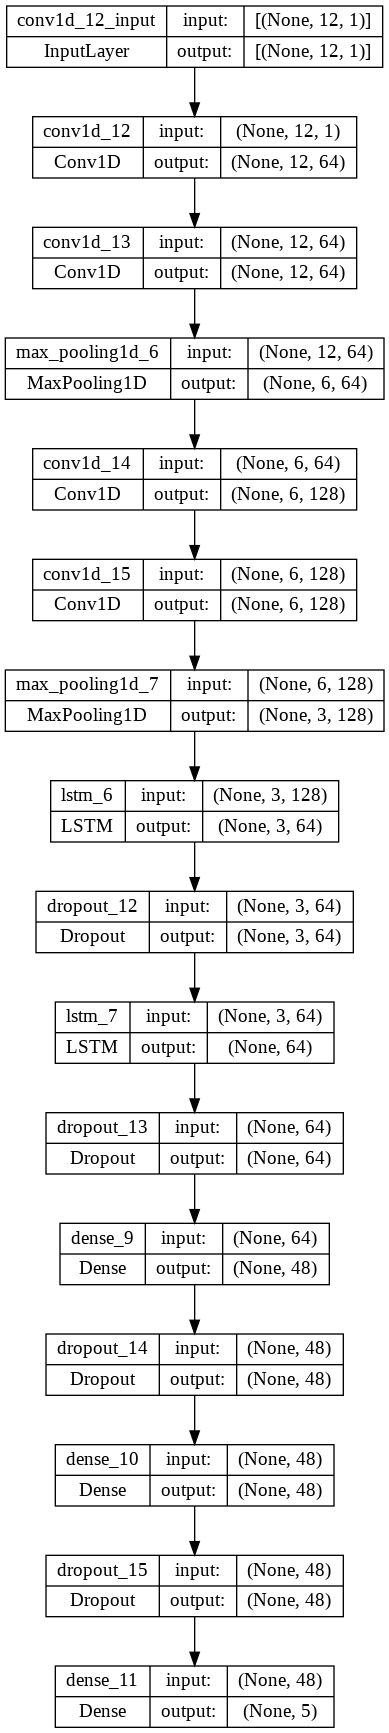

In [ ]:
# representation of model layers
from tensorflow.keras.utils import plot_model
plot_model(cnn_lstm, show_shapes=True, to_file='model_cnn_lstm.png')

In [ ]:
# #Split data: 80% training and 20% testing 
# train_X, test_X, train_y, test_y = train_test_split(X_train, y_train, test_size = 0.2, random_state = 101)

In [ ]:
X_train.drop(columns=['label'],inplace = True)

In [ ]:
X_test.drop(columns=['label'],inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [ ]:
# x_columns_train = X_train.columns.value
# x_train_array = X_train[x_columns_train].values
x_train_1=np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    
dummies = pd.get_dummies(y_train) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y_train_1 = dummies.values
    
# x_columns_test = X_test.columns.drop()
# x_test_array = X_test[x_columns_test].values
x_test_1=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
dummies_test = pd.get_dummies(y_test) # Classification
outcomes_test = dummies_test.columns
num_classes = len(outcomes_test)
y_test_1 = dummies_test.values  

In [ ]:
history= cnn_lstm.fit(x_train_1, y_train_1,validation_data=(x_test_1,y_test_1), batch_size=1000, epochs=10) 

Epoch 1/10
499/499 [==============================] - 123s 236ms/step - loss: 0.2339 - accuracy: 0.9404 - val_loss: 0.1024 - val_accuracy: 0.9661
Epoch 2/10
499/499 [==============================] - 108s 216ms/step - loss: 0.0995 - accuracy: 0.9659 - val_loss: 0.1179 - val_accuracy: 0.9664
Epoch 3/10
499/499 [==============================] - 108s 217ms/step - loss: 0.0952 - accuracy: 0.9667 - val_loss: 0.1197 - val_accuracy: 0.9700
Epoch 4/10
499/499 [==============================] - 118s 236ms/step - loss: 0.0858 - accuracy: 0.9722 - val_loss: 0.0969 - val_accuracy: 0.9732
Epoch 5/10
499/499 [==============================] - 109s 218ms/step - loss: 0.0802 - accuracy: 0.9745 - val_loss: 0.0961 - val_accuracy: 0.9731
Epoch 6/10
499/499 [==============================] - 109s 217ms/step - loss: 0.0747 - accuracy: 0.9769 - val_loss: 0.1081 - val_accuracy: 0.9726
Epoch 7/10
499/499 [==============================] - 114s 228ms/step - loss: 0.0701 - accuracy: 0.9782 - val_loss: 0.1174 -

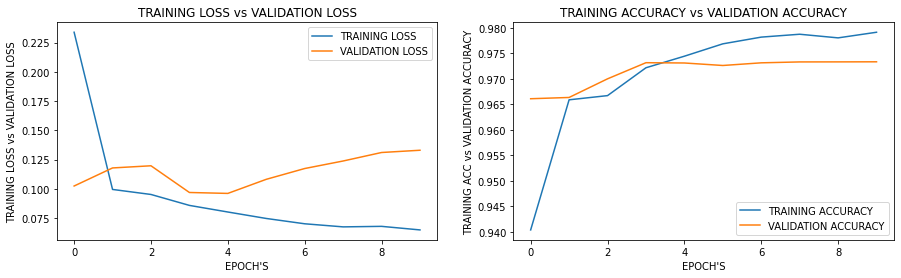

In [ ]:
    #use matplitlib to draw the plots of last epoch
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label = "TRAINING LOSS")
    plt.plot(history.history['val_loss'], label = "VALIDATION LOSS")
    plt.title("TRAINING LOSS vs VALIDATION LOSS")
    plt.xlabel("EPOCH'S")
    plt.ylabel("TRAINING LOSS vs VALIDATION LOSS")
    plt.legend(loc = "best")

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label = "TRAINING ACCURACY")
    plt.plot(history.history['val_accuracy'], label = "VALIDATION ACCURACY")
    plt.title("TRAINING ACCURACY vs VALIDATION ACCURACY")
    plt.xlabel("EPOCH'S")
    plt.ylabel("TRAINING ACC vs VALIDATION ACCURACY")
    plt.legend(loc = "best")

In [ ]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, auc
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

pred1 = cnn_lstm.predict(x_test_1)
pred2 = np.argmax(pred1,axis=1)
pred = le.fit_transform(pred2)
#pred = le.inverse_transform(pred)
y_eval = np.argmax(y_test_1,axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}%".format(score*100)) 

3895/3895 [==============================] - 28s 7ms/step
Validation score: 1.2742328925407627%


In [ ]:
acc = accuracy_score(y_eval, pred)
print("accuracy : ",acc)
recall = recall_score(y_eval, pred, average=None)
print("recall : ",recall)
precision = precision_score(y_eval, pred, average=None)
print("precision : ",precision)
f1_scr = f1_score(y_eval, pred, average=None)
print("f1_score : ",f1_scr)

accuracy :  0.012742328925407626
recall :  [0.00792079 0.         0.64279902 0.         0.        ]
precision :  [7.27431440e-05 0.00000000e+00 1.15017835e-01 0.00000000e+00
 0.00000000e+00]
f1_score :  [1.44162327e-04 0.00000000e+00 1.95121951e-01 0.00000000e+00
 0.00000000e+00]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# 0:Dos  1:normal  2:Probe  3:R2L  4:U2L          
print("####   0:Dos  1:normal  2:Probe  3:R2L  4:U2L  ###\n\n")
print(classification_report(pred, y_eval))

####   0:Dos  1:normal  2:Probe  3:R2L  4:U2L  ###




/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.01      0.00      0.00    109976
           1       0.00      0.00      0.00       911
           2       0.64      0.12      0.20     13737
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.01    124624
   macro avg       0.13      0.02      0.04    124624
weighted avg       0.08      0.01      0.02    124624



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[     0      8     14      0    988]
 [     0 109891      0      0    252]
 [     0      0    878      0   1580]
 [     0      5      0      0    382]
 [     0     72     19      0  10535]] 



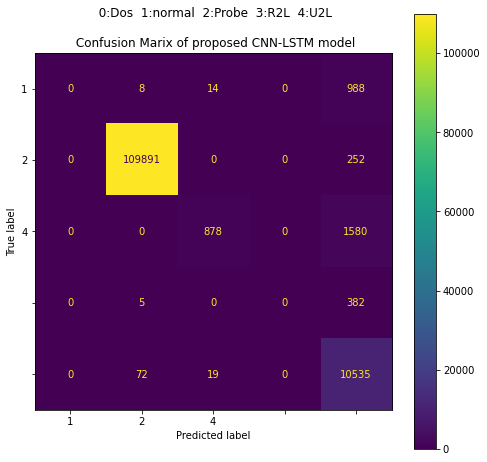

In [ ]:
#confusion matrix 
#import seaborn as sns
#%matplotlib inline

cm = confusion_matrix(y_eval, pred2)
print(cm,'\n')
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(ax=ax)
plt.title('  0:Dos  1:normal  2:Probe  3:R2L  4:U2L \n\n Confusion Marix of proposed CNN-LSTM model')
plt.show()

n_classes: 3


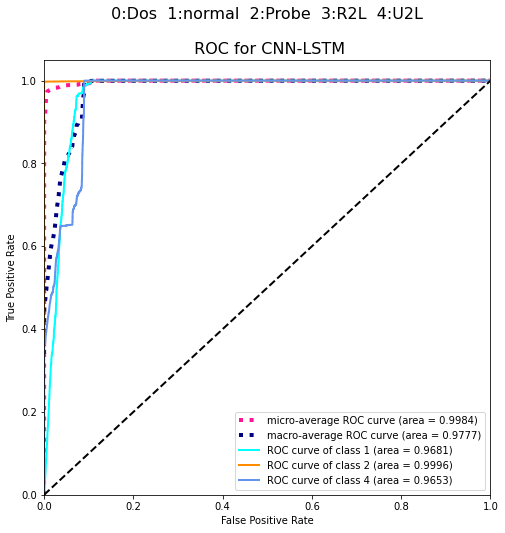

In [ ]:
# ROC curve：

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle
def RoC_Curve(y_score, y, labels, title): 
    y_cat = to_categorical(y)

        
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 2
    # First aggregate all false positive rates
    n_classes = len(labels)
    print('n_classes:', n_classes)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        
        
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_cat.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

        
        
        
    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(8,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

#y_true_2= le.transform(np.argmax(y_test_1,axis=1))
RoC_Curve(pred1, y_eval, le.classes_, title=' 0:Dos  1:normal  2:Probe  3:R2L  4:U2L \n\n ROC for CNN-LSTM')

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

print("TP = ", TP)
print("TN = ", TN)
print("FP = ", FP)
print("FN = ", FN)
print("\n")

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("TPR = ", TPR , "  True positive rate, Sensitivity, hit rate, or recall")
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("FPR = ", FPR, "  False positive rate or fall out")
# Specificity or true negative rate
TNR = TN/(TN+FP)
print("TNR = ", TNR, "  True negative rate or specificity")
# False negative rate
FNR = FN/(TP+FN)
print("FNR = ", FNR, "  False negative rate")
print("\n")

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("PPV = ", PPV, "  Positive predictive value or precision")
# Negative predictive value
NPV = TN/(TN+FN)
print("NPV = ", NPV, "  Negative predictive value")
# False discovery rate
FDR = FP/(TP+FP)
print("FDR = ", FDR, "  False discovery rate")
print("\n")

# Overall accuracy
#ACC = (TP+TN)/(TP+FP+FN+TN)
#print("ACC = ", ACC)

TP =  [     0. 109891.    878.      0.  10535.]
TN =  [123614.  14396. 122133. 124237. 110796.]
FP =  [   0.   85.   33.    0. 3202.]
FN =  [1010.  252. 1580.  387.   91.]


TPR =  [0.         0.99771207 0.35720098 0.         0.9914361 ]   True positive rate, Sensitivity, hit rate, or recall
FPR =  [0.         0.00586976 0.00027012 0.         0.02808821]   False positive rate or fall out
TNR =  [1.         0.99413024 0.99972988 1.         0.97191179]   True negative rate or specificity
FNR =  [1.         0.00228793 0.64279902 1.         0.0085639 ]   False negative rate


PPV =  [       nan 0.9992271  0.96377607        nan 0.76690689]   Positive predictive value or precision
NPV =  [0.99189562 0.98279629 0.9872285  0.99689466 0.99917934]   Negative predictive value
FDR =  [       nan 0.0007729  0.03622393        nan 0.23309311]   False discovery rate




<ipython-input-213-d5cf7f2f8504>:32: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
<ipython-input-213-d5cf7f2f8504>:38: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)
